In [1]:
import cv2
import numpy as np
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,BatchNormalization, Dropout, LSTM, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.preprocessing import scale
from keras.models import Model

In [11]:
import cv2
from tqdm import tqdm, trange
from tensorflow.keras.optimizers import Adam
import pandas as pd
import seaborn as sn
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D, Dropout,GlobalAveragePooling2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from keras.models import Model
import tensorflow as tf 
from tensorflow.keras.applications import *

In [3]:
train_generator  = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    validation_split = 0.2
)

In [4]:
train = train_generator.flow_from_directory(
    "/content/drive/MyDrive/15p_gg/data_fruit/Training",
    target_size=(224,224),
    subset = "training",
    class_mode="categorical",
    shuffle = True
)
valid = train_generator.flow_from_directory(
    "/content/drive/MyDrive/15p_gg/data_fruit/Training",
    target_size=(224,224),
    subset = "validation",
    class_mode="categorical",
    shuffle = True
)

Found 4069 images belonging to 10 classes.
Found 1013 images belonging to 10 classes.


In [5]:
train.class_indices

{'Apple Red 2': 0,
 'Avocado': 1,
 'Banana': 2,
 'Cherry 2': 3,
 'Grape Pink': 4,
 'Litchi': 5,
 'Orange': 6,
 'Peach': 7,
 'Pineapple': 8,
 'Strawberry': 9}

In [13]:
checkpoint_path = "/content/drive/MyDrive/15p_gg/model_traicay_ANN.h5"
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   verbose = 1, 
                   patience=10) #dừng model nếu ko cải thiện\
mc = ModelCheckpoint(checkpoint_path, 
                     monitor='val_accuracy', 
                     mode='max', 
                     save_best_only=True)

In [14]:
model_efficientNet= tf.keras.applications.EfficientNetB4(include_top= False, weights= "imagenet", input_shape= (224,224,3))
model = Sequential()
model.add(model_efficientNet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(10, activation = "sigmoid"))
opt = Adam()
model.compile(optimizer = opt, loss = 'categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train, validation_data = valid, batch_size=128,epochs=30,verbose=1,callbacks = [mc,es])
model.save("/content/drive/MyDrive/15p_gg/model_traicay_ANN.h5")

Epoch 1/30
128/128 [==============================] - 128s 871ms/step - loss: 0.1068 - accuracy: 0.9673 - val_loss: 3.6484 - val_accuracy: 0.0967
Epoch 2/30
128/128 [==============================] - 108s 844ms/step - loss: 0.0541 - accuracy: 0.9877 - val_loss: 3.7938 - val_accuracy: 0.1451
Epoch 3/30
128/128 [==============================] - 108s 845ms/step - loss: 0.0223 - accuracy: 0.9936 - val_loss: 5.5394 - val_accuracy: 0.1500
Epoch 4/30
128/128 [==============================] - 105s 815ms/step - loss: 0.0888 - accuracy: 0.9823 - val_loss: 17.6911 - val_accuracy: 0.0967
Epoch 5/30
128/128 [==============================] - 104s 814ms/step - loss: 0.0281 - accuracy: 0.9921 - val_loss: 5.5916 - val_accuracy: 0.1481
Epoch 6/30
128/128 [==============================] - 108s 846ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 3.2502 - val_accuracy: 0.3643
Epoch 7/30
128/128 [==============================] - 104s 815ms/step - loss: 0.0103 - accuracy: 0.9985 - val_loss: 11.8594

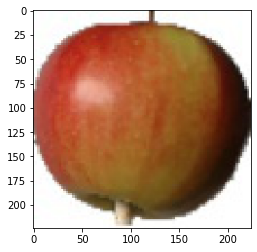

In [18]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from google.colab.patches import cv2_imshow

img = load_img('/content/drive/MyDrive/15p_gg/data_fruit/Testing/Apple Red.jpg', target_size=(224,224))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
img = img.astype('float32')

In [19]:
a = np.argmax(model.predict(img), axis=-1)  
print(model.predict(img))
if a==0:
  print("táo")
elif a==1:
  print("bơ")
elif a == 2:
  print("chuối")
elif a==3:
  print("cherry")
elif a==4:
  print("nho")
elif a == 5:
  print("vãi")
elif a==6:
  print("cam")
elif a==7:
  print("đào")
elif a== 8:
  print("dưa")
elif a == 9:
  print("dâu tây")

[[6.5095082e-07 1.5738291e-20 1.6005098e-14 1.0000000e+00 2.3070418e-03
  2.3063997e-11 4.0854897e-02 9.9999344e-01 1.5110819e-24 9.1069394e-01]]
cherry


In [17]:
score = model.evaluate(valid,verbose=0)
print('Test loss: ',score[0])
print('test accuraccy',score[1])


Test loss:  7.404417991638184
test accuraccy 0.09674234688282013
